In [95]:
#Importamos las librerias a utilizar
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
import pandas as pd
import seaborn as sns

Conjunto de datos sobre la diabetes en una población

Describe los datos de los registros médicos de los pacientes  y si tenían la aparición de la diabetes en un plazo de cinco años. Se trata de un problema de clasificación binaria (aparición de diabetes como 1 o no como 0). Las variables de entrada que describen a cada paciente son numéricas y tienen variables de escalas. A continuación se enumeran los ocho atributos del set de datos:

1. Número de embarazos.
2. Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
3. Presión arterial diastólica (mm Hg).
4. Grosor del pliegue de la piel del tríceps (mm).
5. Insulina sérica de 2 horas (mu U/ml).
6. Índice de masa corporal.
7. Función del pedigrí de la diabetes.
8. Edad (años).
9. Clase, aparición de diabetes en un plazo de cinco años.

In [96]:
df = pd.read_csv("pacientes_diabetes.csv")
df.columns = ['NumEmbarazos', 'Glucosa', 'PresionArt', 'Grosor', 'Insulina', 'IMC', 'FPedigri','Edad','Clase']
df.columns

Index(['NumEmbarazos', 'Glucosa', 'PresionArt', 'Grosor', 'Insulina', 'IMC',
       'FPedigri', 'Edad', 'Clase'],
      dtype='object')

In [97]:
# Información del DF
print(df.shape)

# Conociendo el DF
print(df.head(5))

# Describiendo el DF
print(df.describe())

# Conociendo la información
print(df.info())

# Cantidad de clases de diabetes
print(df.groupby("Clase").size())

(767, 9)
   NumEmbarazos  Glucosa  PresionArt  Grosor  Insulina   IMC  FPedigri  Edad  \
0             1       85          66      29         0  26.6     0.351    31   
1             8      183          64       0         0  23.3     0.672    32   
2             1       89          66      23        94  28.1     0.167    21   
3             0      137          40      35       168  43.1     2.288    33   
4             5      116          74       0         0  25.6     0.201    30   

   Clase  
0      0  
1      1  
2      0  
3      1  
4      0  
       NumEmbarazos     Glucosa  PresionArt      Grosor    Insulina  \
count    767.000000  767.000000  767.000000  767.000000  767.000000   
mean       3.842243  120.859192   69.101695   20.517601   79.903520   
std        3.370877   31.978468   19.368155   15.954059  115.283105   
min        0.000000    0.000000    0.000000    0.000000    0.000000   
25%        1.000000   99.000000   62.000000    0.000000    0.000000   
50%        3.00000

In [98]:
## Conociendo la correlación
datos = df.astype(float)
print(datos.corr())

              NumEmbarazos   Glucosa  PresionArt    Grosor  Insulina  \
NumEmbarazos      1.000000  0.128846    0.141197 -0.082495 -0.072999   
Glucosa           0.128846  1.000000    0.152498  0.056381  0.332383   
PresionArt        0.141197  0.152498    1.000000  0.207308  0.089098   
Grosor           -0.082495  0.056381    0.207308  1.000000  0.437974   
Insulina         -0.072999  0.332383    0.089098  0.437974  1.000000   
IMC               0.017518  0.220955    0.281777  0.392553  0.198111   
FPedigri         -0.033927  0.136903    0.041180  0.183498  0.185579   
Edad              0.544018  0.262408    0.239571 -0.115873 -0.040942   
Clase             0.221087  0.465856    0.064882  0.073265  0.131984   

                   IMC  FPedigri      Edad     Clase  
NumEmbarazos  0.017518 -0.033927  0.544018  0.221087  
Glucosa       0.220955  0.136903  0.262408  0.465856  
PresionArt    0.281777  0.041180  0.239571  0.064882  
Grosor        0.392553  0.183498 -0.115873  0.073265  
Insu

Revisando la correlacion de los datos con el target que es la clase, se puede utilizar las 8 caracteristicas del data set

Index(['NumEmbarazos', 'Glucosa', 'PresionArt', 'Grosor', 'Insulina', 'IMC',
       'FPedigri', 'Edad', 'Clase'],
      dtype='object')


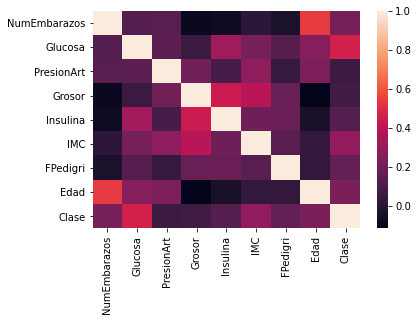

In [99]:
sns.heatmap(
    datos.corr()
)
print(df.columns)

Aqui podemos observar con mas claridad que las 8 caracteristicas tiene una correlacion directamente proporcional

In [100]:
#Separamos los datos de nuestras caracteristicas con el target
caracteristicas =[
  'NumEmbarazos', 'Glucosa', 'PresionArt', 'Grosor', 'Insulina', 'IMC', 'FPedigri','Edad'
]
training_data = datos[caracteristicas][1:] # X
target_data = datos["Clase"][1:] # Y
print(training_data,target_data)

     NumEmbarazos  Glucosa  PresionArt  Grosor  Insulina   IMC  FPedigri  Edad
1             8.0    183.0        64.0     0.0       0.0  23.3     0.672  32.0
2             1.0     89.0        66.0    23.0      94.0  28.1     0.167  21.0
3             0.0    137.0        40.0    35.0     168.0  43.1     2.288  33.0
4             5.0    116.0        74.0     0.0       0.0  25.6     0.201  30.0
5             3.0     78.0        50.0    32.0      88.0  31.0     0.248  26.0
..            ...      ...         ...     ...       ...   ...       ...   ...
762          10.0    101.0        76.0    48.0     180.0  32.9     0.171  63.0
763           2.0    122.0        70.0    27.0       0.0  36.8     0.340  27.0
764           5.0    121.0        72.0    23.0     112.0  26.2     0.245  30.0
765           1.0    126.0        60.0     0.0       0.0  30.1     0.349  47.0
766           1.0     93.0        70.0    31.0       0.0  30.4     0.315  23.0

[766 rows x 8 columns] 1      1.0
2      0.0
3     

In [101]:
model = Sequential()
model.add(Dense(24, input_dim=8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Primero creamos un modelo vacio de tipo Sequential. Este modelo se refiere a que crearemos una serie de capas de neuronas secuenciales, “una delante de otra”.

Agregamos dos capas Dense con “model.add()”. Realmente serán 3 capas, pues al poner input_dim=8 estamos definiendo la capa de entrada con 8 neuronas y la primer capa oculta (hidden) de 24 neuronas. Como función de activación utilizaremos “relu” que sabemos que da buenos resultados.

Y agregamos una capa con 1 neurona de salida y función de activación sigmoid

In [102]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

Con esto indicamos el tipo de pérdida (loss) que utilizaremos, el “optimizador” de los pesos de las conexiones de las neuronas y las métricas que queremos obtener.

Indicamos con model.fit() las entradas y sus salidas y la cantidad de iteraciones de aprendizaje (epochs en este caso 2000) de entrenamiento.

In [105]:
model.fit(training_data, target_data, epochs=2000)

Epoch 1/2000
24/24 [==============================] - 0s 771us/step - loss: 0.1340 - binary_accuracy: 0.8133
Epoch 2/2000
24/24 [==============================] - 0s 829us/step - loss: 0.1364 - binary_accuracy: 0.7990
Epoch 3/2000
24/24 [==============================] - 0s 824us/step - loss: 0.1355 - binary_accuracy: 0.8133
Epoch 4/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.1382 - binary_accuracy: 0.7990
Epoch 5/2000
24/24 [==============================] - 0s 884us/step - loss: 0.1337 - binary_accuracy: 0.8225
Epoch 6/2000
24/24 [==============================] - 0s 737us/step - loss: 0.1337 - binary_accuracy: 0.8159
Epoch 7/2000
24/24 [==============================] - 0s 911us/step - loss: 0.1349 - binary_accuracy: 0.8185
Epoch 8/2000
24/24 [==============================] - 0s 823us/step - loss: 0.1362 - binary_accuracy: 0.8198
Epoch 9/2000
24/24 [==============================] - 0s 744us/step - loss: 0.1353 - binary_accuracy: 0.8133
Epoch 10/2000
24/24 [

24/24 [==============================] - 0s 723us/step - loss: 0.1333 - binary_accuracy: 0.8172
Epoch 76/2000
24/24 [==============================] - 0s 737us/step - loss: 0.1341 - binary_accuracy: 0.8133
Epoch 77/2000
24/24 [==============================] - 0s 699us/step - loss: 0.1326 - binary_accuracy: 0.8198
Epoch 78/2000
24/24 [==============================] - 0s 689us/step - loss: 0.1377 - binary_accuracy: 0.8068
Epoch 79/2000
24/24 [==============================] - 0s 733us/step - loss: 0.1389 - binary_accuracy: 0.8029
Epoch 80/2000
24/24 [==============================] - 0s 643us/step - loss: 0.1360 - binary_accuracy: 0.8120
Epoch 81/2000
24/24 [==============================] - 0s 762us/step - loss: 0.1365 - binary_accuracy: 0.8068
Epoch 82/2000
24/24 [==============================] - 0s 656us/step - loss: 0.1348 - binary_accuracy: 0.8159
Epoch 83/2000
24/24 [==============================] - 0s 693us/step - loss: 0.1358 - binary_accuracy: 0.7990
Epoch 84/2000
24/24 [===

24/24 [==============================] - 0s 616us/step - loss: 0.1321 - binary_accuracy: 0.8264
Epoch 149/2000
24/24 [==============================] - 0s 730us/step - loss: 0.1324 - binary_accuracy: 0.8081
Epoch 150/2000
24/24 [==============================] - 0s 675us/step - loss: 0.1354 - binary_accuracy: 0.8133
Epoch 151/2000
24/24 [==============================] - 0s 653us/step - loss: 0.1343 - binary_accuracy: 0.8042
Epoch 152/2000
24/24 [==============================] - 0s 781us/step - loss: 0.1326 - binary_accuracy: 0.8225
Epoch 153/2000
24/24 [==============================] - 0s 737us/step - loss: 0.1353 - binary_accuracy: 0.7950
Epoch 154/2000
24/24 [==============================] - 0s 697us/step - loss: 0.1329 - binary_accuracy: 0.8094
Epoch 155/2000
24/24 [==============================] - 0s 691us/step - loss: 0.1318 - binary_accuracy: 0.8290
Epoch 156/2000
24/24 [==============================] - 0s 685us/step - loss: 0.1310 - binary_accuracy: 0.8277
Epoch 157/2000
2

Epoch 222/2000
24/24 [==============================] - 0s 678us/step - loss: 0.1329 - binary_accuracy: 0.8251
Epoch 223/2000
24/24 [==============================] - 0s 733us/step - loss: 0.1312 - binary_accuracy: 0.8172
Epoch 224/2000
24/24 [==============================] - 0s 690us/step - loss: 0.1410 - binary_accuracy: 0.8003
Epoch 225/2000
24/24 [==============================] - 0s 677us/step - loss: 0.1416 - binary_accuracy: 0.8016
Epoch 226/2000
24/24 [==============================] - 0s 737us/step - loss: 0.1365 - binary_accuracy: 0.8094
Epoch 227/2000
24/24 [==============================] - 0s 692us/step - loss: 0.1351 - binary_accuracy: 0.8159
Epoch 228/2000
24/24 [==============================] - 0s 748us/step - loss: 0.1351 - binary_accuracy: 0.8172
Epoch 229/2000
24/24 [==============================] - 0s 658us/step - loss: 0.1429 - binary_accuracy: 0.8029
Epoch 230/2000
24/24 [==============================] - 0s 640us/step - loss: 0.1375 - binary_accuracy: 0.7977
E

24/24 [==============================] - 0s 740us/step - loss: 0.1386 - binary_accuracy: 0.8107
Epoch 296/2000
24/24 [==============================] - 0s 764us/step - loss: 0.1352 - binary_accuracy: 0.8120
Epoch 297/2000
24/24 [==============================] - 0s 651us/step - loss: 0.1444 - binary_accuracy: 0.8003
Epoch 298/2000
24/24 [==============================] - 0s 773us/step - loss: 0.1318 - binary_accuracy: 0.8225
Epoch 299/2000
24/24 [==============================] - 0s 715us/step - loss: 0.1361 - binary_accuracy: 0.8146
Epoch 300/2000
24/24 [==============================] - 0s 723us/step - loss: 0.1343 - binary_accuracy: 0.8068
Epoch 301/2000
24/24 [==============================] - 0s 653us/step - loss: 0.1351 - binary_accuracy: 0.8133
Epoch 302/2000
24/24 [==============================] - 0s 684us/step - loss: 0.1326 - binary_accuracy: 0.8120
Epoch 303/2000
24/24 [==============================] - 0s 757us/step - loss: 0.1299 - binary_accuracy: 0.8277
Epoch 304/2000
2

Epoch 369/2000
24/24 [==============================] - 0s 652us/step - loss: 0.1313 - binary_accuracy: 0.8107
Epoch 370/2000
24/24 [==============================] - 0s 695us/step - loss: 0.1360 - binary_accuracy: 0.8042
Epoch 371/2000
24/24 [==============================] - 0s 672us/step - loss: 0.1343 - binary_accuracy: 0.8133
Epoch 372/2000
24/24 [==============================] - 0s 652us/step - loss: 0.1333 - binary_accuracy: 0.8277
Epoch 373/2000
24/24 [==============================] - 0s 759us/step - loss: 0.1306 - binary_accuracy: 0.8225
Epoch 374/2000
24/24 [==============================] - 0s 685us/step - loss: 0.1310 - binary_accuracy: 0.8251
Epoch 375/2000
24/24 [==============================] - 0s 670us/step - loss: 0.1304 - binary_accuracy: 0.8264
Epoch 376/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1309 - binary_accuracy: 0.8251
Epoch 377/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1310 - binary_accuracy: 0.8251
E

24/24 [==============================] - 0s 667us/step - loss: 0.1362 - binary_accuracy: 0.8146
Epoch 443/2000
24/24 [==============================] - 0s 650us/step - loss: 0.1308 - binary_accuracy: 0.8211
Epoch 444/2000
24/24 [==============================] - 0s 703us/step - loss: 0.1320 - binary_accuracy: 0.8081
Epoch 445/2000
24/24 [==============================] - 0s 685us/step - loss: 0.1356 - binary_accuracy: 0.8172
Epoch 446/2000
24/24 [==============================] - 0s 816us/step - loss: 0.1330 - binary_accuracy: 0.8225
Epoch 447/2000
24/24 [==============================] - 0s 664us/step - loss: 0.1462 - binary_accuracy: 0.7924
Epoch 448/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1346 - binary_accuracy: 0.8107
Epoch 449/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1325 - binary_accuracy: 0.8159
Epoch 450/2000
24/24 [==============================] - 0s 681us/step - loss: 0.1377 - binary_accuracy: 0.7963
Epoch 451/2000
2

24/24 [==============================] - 0s 698us/step - loss: 0.1285 - binary_accuracy: 0.8238
Epoch 516/2000
24/24 [==============================] - 0s 698us/step - loss: 0.1285 - binary_accuracy: 0.8159
Epoch 517/2000
24/24 [==============================] - 0s 714us/step - loss: 0.1345 - binary_accuracy: 0.8225
Epoch 518/2000
24/24 [==============================] - 0s 713us/step - loss: 0.1319 - binary_accuracy: 0.8185
Epoch 519/2000
24/24 [==============================] - 0s 693us/step - loss: 0.1342 - binary_accuracy: 0.8081
Epoch 520/2000
24/24 [==============================] - 0s 684us/step - loss: 0.1402 - binary_accuracy: 0.7924
Epoch 521/2000
24/24 [==============================] - 0s 721us/step - loss: 0.1326 - binary_accuracy: 0.8172
Epoch 522/2000
24/24 [==============================] - 0s 778us/step - loss: 0.1302 - binary_accuracy: 0.8251
Epoch 523/2000
24/24 [==============================] - 0s 664us/step - loss: 0.1396 - binary_accuracy: 0.7963
Epoch 524/2000
2

Epoch 589/2000
24/24 [==============================] - 0s 686us/step - loss: 0.1260 - binary_accuracy: 0.8238
Epoch 590/2000
24/24 [==============================] - 0s 610us/step - loss: 0.1253 - binary_accuracy: 0.8329
Epoch 591/2000
24/24 [==============================] - 0s 618us/step - loss: 0.1306 - binary_accuracy: 0.8120
Epoch 592/2000
24/24 [==============================] - 0s 689us/step - loss: 0.1365 - binary_accuracy: 0.8003
Epoch 593/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1296 - binary_accuracy: 0.8303
Epoch 594/2000
24/24 [==============================] - 0s 725us/step - loss: 0.1262 - binary_accuracy: 0.8264
Epoch 595/2000
24/24 [==============================] - 0s 698us/step - loss: 0.1294 - binary_accuracy: 0.8225
Epoch 596/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1334 - binary_accuracy: 0.8120
Epoch 597/2000
24/24 [==============================] - 0s 650us/step - loss: 0.1309 - binary_accuracy: 0.8290
E

24/24 [==============================] - 0s 821us/step - loss: 0.1247 - binary_accuracy: 0.8290
Epoch 663/2000
24/24 [==============================] - 0s 885us/step - loss: 0.1312 - binary_accuracy: 0.8146
Epoch 664/2000
24/24 [==============================] - 0s 974us/step - loss: 0.1249 - binary_accuracy: 0.8251
Epoch 665/2000
24/24 [==============================] - 0s 936us/step - loss: 0.1269 - binary_accuracy: 0.8329
Epoch 666/2000
24/24 [==============================] - 0s 826us/step - loss: 0.1296 - binary_accuracy: 0.8198
Epoch 667/2000
24/24 [==============================] - 0s 830us/step - loss: 0.1283 - binary_accuracy: 0.8264
Epoch 668/2000
24/24 [==============================] - 0s 940us/step - loss: 0.1245 - binary_accuracy: 0.8329
Epoch 669/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.1279 - binary_accuracy: 0.8264
Epoch 670/2000
24/24 [==============================] - 0s 996us/step - loss: 0.1290 - binary_accuracy: 0.8211
Epoch 671/2000
24/

Epoch 736/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1328 - binary_accuracy: 0.8198
Epoch 737/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1249 - binary_accuracy: 0.8225
Epoch 738/2000
24/24 [==============================] - 0s 708us/step - loss: 0.1252 - binary_accuracy: 0.8316
Epoch 739/2000
24/24 [==============================] - 0s 736us/step - loss: 0.1264 - binary_accuracy: 0.8316
Epoch 740/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1326 - binary_accuracy: 0.8146
Epoch 741/2000
24/24 [==============================] - 0s 720us/step - loss: 0.1275 - binary_accuracy: 0.8211
Epoch 742/2000
24/24 [==============================] - 0s 684us/step - loss: 0.1318 - binary_accuracy: 0.8211
Epoch 743/2000
24/24 [==============================] - 0s 648us/step - loss: 0.1256 - binary_accuracy: 0.8290
Epoch 744/2000
24/24 [==============================] - 0s 650us/step - loss: 0.1250 - binary_accuracy: 0.8303
E

24/24 [==============================] - 0s 658us/step - loss: 0.1323 - binary_accuracy: 0.8264
Epoch 810/2000
24/24 [==============================] - 0s 735us/step - loss: 0.1304 - binary_accuracy: 0.8238
Epoch 811/2000
24/24 [==============================] - 0s 691us/step - loss: 0.1285 - binary_accuracy: 0.8238
Epoch 812/2000
24/24 [==============================] - 0s 650us/step - loss: 0.1308 - binary_accuracy: 0.8120
Epoch 813/2000
24/24 [==============================] - 0s 765us/step - loss: 0.1326 - binary_accuracy: 0.8185
Epoch 814/2000
24/24 [==============================] - 0s 707us/step - loss: 0.1262 - binary_accuracy: 0.8316
Epoch 815/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1242 - binary_accuracy: 0.8329
Epoch 816/2000
24/24 [==============================] - 0s 737us/step - loss: 0.1403 - binary_accuracy: 0.7977
Epoch 817/2000
24/24 [==============================] - 0s 781us/step - loss: 0.1310 - binary_accuracy: 0.8185
Epoch 818/2000
2

Epoch 883/2000
24/24 [==============================] - 0s 867us/step - loss: 0.1239 - binary_accuracy: 0.8290
Epoch 884/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.1235 - binary_accuracy: 0.8329
Epoch 885/2000
24/24 [==============================] - 0s 954us/step - loss: 0.1264 - binary_accuracy: 0.8225
Epoch 886/2000
24/24 [==============================] - 0s 788us/step - loss: 0.1277 - binary_accuracy: 0.8238
Epoch 887/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1243 - binary_accuracy: 0.8342
Epoch 888/2000
24/24 [==============================] - 0s 607us/step - loss: 0.1277 - binary_accuracy: 0.8225
Epoch 889/2000
24/24 [==============================] - 0s 648us/step - loss: 0.1234 - binary_accuracy: 0.8251
Epoch 890/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1395 - binary_accuracy: 0.8016
Epoch 891/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1302 - binary_accuracy: 0.8185
Epo

24/24 [==============================] - 0s 723us/step - loss: 0.1299 - binary_accuracy: 0.8068
Epoch 957/2000
24/24 [==============================] - 0s 684us/step - loss: 0.1260 - binary_accuracy: 0.8342
Epoch 958/2000
24/24 [==============================] - 0s 867us/step - loss: 0.1277 - binary_accuracy: 0.8238
Epoch 959/2000
24/24 [==============================] - 0s 996us/step - loss: 0.1307 - binary_accuracy: 0.8094
Epoch 960/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.1295 - binary_accuracy: 0.8185
Epoch 961/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.1308 - binary_accuracy: 0.8290
Epoch 962/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.1232 - binary_accuracy: 0.8264
Epoch 963/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.1399 - binary_accuracy: 0.8133
Epoch 964/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.1260 - binary_accuracy: 0.8185
Epoch 965/2000
24/24 [====

24/24 [==============================] - 0s 650us/step - loss: 0.1263 - binary_accuracy: 0.8238
Epoch 1031/2000
24/24 [==============================] - 0s 827us/step - loss: 0.1245 - binary_accuracy: 0.8303
Epoch 1032/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1257 - binary_accuracy: 0.8198
Epoch 1033/2000
24/24 [==============================] - 0s 823us/step - loss: 0.1231 - binary_accuracy: 0.8290
Epoch 1034/2000
24/24 [==============================] - 0s 714us/step - loss: 0.1234 - binary_accuracy: 0.8329
Epoch 1035/2000
24/24 [==============================] - 0s 866us/step - loss: 0.1242 - binary_accuracy: 0.8277
Epoch 1036/2000
24/24 [==============================] - 0s 911us/step - loss: 0.1216 - binary_accuracy: 0.8303
Epoch 1037/2000
24/24 [==============================] - 0s 868us/step - loss: 0.1273 - binary_accuracy: 0.8251
Epoch 1038/2000
24/24 [==============================] - 0s 867us/step - loss: 0.1224 - binary_accuracy: 0.8368
Epoch 10

24/24 [==============================] - 0s 782us/step - loss: 0.1234 - binary_accuracy: 0.8277
Epoch 1104/2000
24/24 [==============================] - 0s 822us/step - loss: 0.1255 - binary_accuracy: 0.8264
Epoch 1105/2000
24/24 [==============================] - 0s 861us/step - loss: 0.1317 - binary_accuracy: 0.8094
Epoch 1106/2000
24/24 [==============================] - 0s 700us/step - loss: 0.1243 - binary_accuracy: 0.8225
Epoch 1107/2000
24/24 [==============================] - 0s 737us/step - loss: 0.1243 - binary_accuracy: 0.8211
Epoch 1108/2000
24/24 [==============================] - 0s 803us/step - loss: 0.1224 - binary_accuracy: 0.8316
Epoch 1109/2000
24/24 [==============================] - 0s 806us/step - loss: 0.1227 - binary_accuracy: 0.8329
Epoch 1110/2000
24/24 [==============================] - 0s 828us/step - loss: 0.1220 - binary_accuracy: 0.8264
Epoch 1111/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1217 - binary_accuracy: 0.8251
Epoch 11

24/24 [==============================] - 0s 812us/step - loss: 0.1220 - binary_accuracy: 0.8355
Epoch 1177/2000
24/24 [==============================] - 0s 779us/step - loss: 0.1219 - binary_accuracy: 0.8329
Epoch 1178/2000
24/24 [==============================] - 0s 788us/step - loss: 0.1238 - binary_accuracy: 0.8394
Epoch 1179/2000
24/24 [==============================] - 0s 824us/step - loss: 0.1246 - binary_accuracy: 0.8238
Epoch 1180/2000
24/24 [==============================] - 0s 726us/step - loss: 0.1245 - binary_accuracy: 0.8238
Epoch 1181/2000
24/24 [==============================] - 0s 709us/step - loss: 0.1263 - binary_accuracy: 0.8290
Epoch 1182/2000
24/24 [==============================] - 0s 702us/step - loss: 0.1262 - binary_accuracy: 0.8277
Epoch 1183/2000
24/24 [==============================] - 0s 781us/step - loss: 0.1241 - binary_accuracy: 0.8329
Epoch 1184/2000
24/24 [==============================] - 0s 695us/step - loss: 0.1268 - binary_accuracy: 0.8238
Epoch 11

24/24 [==============================] - 0s 1ms/step - loss: 0.1289 - binary_accuracy: 0.8238
Epoch 1250/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.1270 - binary_accuracy: 0.8316
Epoch 1251/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.1319 - binary_accuracy: 0.8251
Epoch 1252/2000
24/24 [==============================] - 0s 738us/step - loss: 0.1206 - binary_accuracy: 0.8433
Epoch 1253/2000
24/24 [==============================] - 0s 737us/step - loss: 0.1324 - binary_accuracy: 0.8198
Epoch 1254/2000
24/24 [==============================] - 0s 738us/step - loss: 0.1250 - binary_accuracy: 0.8264
Epoch 1255/2000
24/24 [==============================] - 0s 738us/step - loss: 0.1285 - binary_accuracy: 0.8264
Epoch 1256/2000
24/24 [==============================] - 0s 738us/step - loss: 0.1259 - binary_accuracy: 0.8303
Epoch 1257/2000
24/24 [==============================] - 0s 827us/step - loss: 0.1195 - binary_accuracy: 0.8290
Epoch 1258/200

24/24 [==============================] - 0s 998us/step - loss: 0.1255 - binary_accuracy: 0.8264
Epoch 1323/2000
24/24 [==============================] - 0s 1ms/step - loss: 0.1334 - binary_accuracy: 0.8185
Epoch 1324/2000
24/24 [==============================] - 0s 910us/step - loss: 0.1265 - binary_accuracy: 0.8316
Epoch 1325/2000
24/24 [==============================] - 0s 867us/step - loss: 0.1270 - binary_accuracy: 0.8225
Epoch 1326/2000
24/24 [==============================] - 0s 737us/step - loss: 0.1236 - binary_accuracy: 0.8329
Epoch 1327/2000
24/24 [==============================] - 0s 867us/step - loss: 0.1226 - binary_accuracy: 0.8277
Epoch 1328/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1264 - binary_accuracy: 0.8251
Epoch 1329/2000
24/24 [==============================] - 0s 911us/step - loss: 0.1191 - binary_accuracy: 0.8420
Epoch 1330/2000
24/24 [==============================] - 0s 867us/step - loss: 0.1210 - binary_accuracy: 0.8407
Epoch 1331

24/24 [==============================] - 0s 824us/step - loss: 0.1238 - binary_accuracy: 0.8316
Epoch 1396/2000
24/24 [==============================] - 0s 824us/step - loss: 0.1265 - binary_accuracy: 0.8277
Epoch 1397/2000
24/24 [==============================] - 0s 954us/step - loss: 0.1224 - binary_accuracy: 0.8290
Epoch 1398/2000
24/24 [==============================] - 0s 824us/step - loss: 0.1192 - binary_accuracy: 0.8368
Epoch 1399/2000
24/24 [==============================] - 0s 867us/step - loss: 0.1206 - binary_accuracy: 0.8368
Epoch 1400/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1258 - binary_accuracy: 0.8277
Epoch 1401/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1283 - binary_accuracy: 0.8290
Epoch 1402/2000
24/24 [==============================] - 0s 867us/step - loss: 0.1195 - binary_accuracy: 0.8329
Epoch 1403/2000
24/24 [==============================] - 0s 737us/step - loss: 0.1208 - binary_accuracy: 0.8316
Epoch 14

24/24 [==============================] - 0s 635us/step - loss: 0.1200 - binary_accuracy: 0.8394
Epoch 1469/2000
24/24 [==============================] - 0s 607us/step - loss: 0.1242 - binary_accuracy: 0.8277
Epoch 1470/2000
24/24 [==============================] - 0s 607us/step - loss: 0.1266 - binary_accuracy: 0.8225
Epoch 1471/2000
24/24 [==============================] - 0s 649us/step - loss: 0.1238 - binary_accuracy: 0.8290
Epoch 1472/2000
24/24 [==============================] - 0s 606us/step - loss: 0.1203 - binary_accuracy: 0.8342
Epoch 1473/2000
24/24 [==============================] - 0s 649us/step - loss: 0.1218 - binary_accuracy: 0.8316
Epoch 1474/2000
24/24 [==============================] - 0s 686us/step - loss: 0.1208 - binary_accuracy: 0.8329
Epoch 1475/2000
24/24 [==============================] - 0s 608us/step - loss: 0.1179 - binary_accuracy: 0.8460
Epoch 1476/2000
24/24 [==============================] - 0s 652us/step - loss: 0.1249 - binary_accuracy: 0.8342
Epoch 14

24/24 [==============================] - 0s 692us/step - loss: 0.1245 - binary_accuracy: 0.8238
Epoch 1542/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1253 - binary_accuracy: 0.8277
Epoch 1543/2000
24/24 [==============================] - 0s 693us/step - loss: 0.1215 - binary_accuracy: 0.8316
Epoch 1544/2000
24/24 [==============================] - 0s 876us/step - loss: 0.1223 - binary_accuracy: 0.8290
Epoch 1545/2000
24/24 [==============================] - 0s 781us/step - loss: 0.1233 - binary_accuracy: 0.8316
Epoch 1546/2000
24/24 [==============================] - 0s 737us/step - loss: 0.1232 - binary_accuracy: 0.8251
Epoch 1547/2000
24/24 [==============================] - 0s 728us/step - loss: 0.1342 - binary_accuracy: 0.8107
Epoch 1548/2000
24/24 [==============================] - 0s 616us/step - loss: 0.1268 - binary_accuracy: 0.8211
Epoch 1549/2000
24/24 [==============================] - 0s 693us/step - loss: 0.1275 - binary_accuracy: 0.8211
Epoch 15

24/24 [==============================] - 0s 739us/step - loss: 0.1276 - binary_accuracy: 0.8355
Epoch 1615/2000
24/24 [==============================] - 0s 704us/step - loss: 0.1262 - binary_accuracy: 0.8264
Epoch 1616/2000
24/24 [==============================] - 0s 737us/step - loss: 0.1212 - binary_accuracy: 0.8433
Epoch 1617/2000
24/24 [==============================] - 0s 794us/step - loss: 0.1264 - binary_accuracy: 0.8342
Epoch 1618/2000
24/24 [==============================] - 0s 695us/step - loss: 0.1220 - binary_accuracy: 0.8355
Epoch 1619/2000
24/24 [==============================] - 0s 695us/step - loss: 0.1218 - binary_accuracy: 0.8238
Epoch 1620/2000
24/24 [==============================] - 0s 655us/step - loss: 0.1239 - binary_accuracy: 0.8290
Epoch 1621/2000
24/24 [==============================] - 0s 650us/step - loss: 0.1238 - binary_accuracy: 0.8368
Epoch 1622/2000
24/24 [==============================] - 0s 731us/step - loss: 0.1211 - binary_accuracy: 0.8342
Epoch 16

24/24 [==============================] - 0s 686us/step - loss: 0.1234 - binary_accuracy: 0.8251
Epoch 1688/2000
24/24 [==============================] - 0s 646us/step - loss: 0.1258 - binary_accuracy: 0.8277
Epoch 1689/2000
24/24 [==============================] - 0s 691us/step - loss: 0.1192 - binary_accuracy: 0.8368
Epoch 1690/2000
24/24 [==============================] - 0s 728us/step - loss: 0.1209 - binary_accuracy: 0.8381
Epoch 1691/2000
24/24 [==============================] - 0s 671us/step - loss: 0.1191 - binary_accuracy: 0.8329
Epoch 1692/2000
24/24 [==============================] - 0s 666us/step - loss: 0.1226 - binary_accuracy: 0.8211
Epoch 1693/2000
24/24 [==============================] - 0s 770us/step - loss: 0.1225 - binary_accuracy: 0.8394
Epoch 1694/2000
24/24 [==============================] - 0s 621us/step - loss: 0.1177 - binary_accuracy: 0.8251
Epoch 1695/2000
24/24 [==============================] - 0s 611us/step - loss: 0.1191 - binary_accuracy: 0.8368
Epoch 16

24/24 [==============================] - 0s 844us/step - loss: 0.1247 - binary_accuracy: 0.8290
Epoch 1761/2000
24/24 [==============================] - 0s 933us/step - loss: 0.1289 - binary_accuracy: 0.8238
Epoch 1762/2000
24/24 [==============================] - 0s 975us/step - loss: 0.1363 - binary_accuracy: 0.8146
Epoch 1763/2000
24/24 [==============================] - 0s 910us/step - loss: 0.1231 - binary_accuracy: 0.8329
Epoch 1764/2000
24/24 [==============================] - 0s 789us/step - loss: 0.1257 - binary_accuracy: 0.8238
Epoch 1765/2000
24/24 [==============================] - 0s 847us/step - loss: 0.1237 - binary_accuracy: 0.8355
Epoch 1766/2000
24/24 [==============================] - 0s 757us/step - loss: 0.1222 - binary_accuracy: 0.8433
Epoch 1767/2000
24/24 [==============================] - 0s 758us/step - loss: 0.1217 - binary_accuracy: 0.8368
Epoch 1768/2000
24/24 [==============================] - 0s 911us/step - loss: 0.1272 - binary_accuracy: 0.8264
Epoch 17

24/24 [==============================] - 0s 787us/step - loss: 0.1230 - binary_accuracy: 0.8329
Epoch 1834/2000
24/24 [==============================] - 0s 704us/step - loss: 0.1199 - binary_accuracy: 0.8446
Epoch 1835/2000
24/24 [==============================] - 0s 701us/step - loss: 0.1246 - binary_accuracy: 0.8238
Epoch 1836/2000
24/24 [==============================] - 0s 710us/step - loss: 0.1253 - binary_accuracy: 0.8290
Epoch 1837/2000
24/24 [==============================] - 0s 641us/step - loss: 0.1212 - binary_accuracy: 0.8342
Epoch 1838/2000
24/24 [==============================] - 0s 637us/step - loss: 0.1215 - binary_accuracy: 0.8316
Epoch 1839/2000
24/24 [==============================] - 0s 682us/step - loss: 0.1193 - binary_accuracy: 0.8407
Epoch 1840/2000
24/24 [==============================] - 0s 681us/step - loss: 0.1220 - binary_accuracy: 0.8407
Epoch 1841/2000
24/24 [==============================] - 0s 812us/step - loss: 0.1248 - binary_accuracy: 0.8407
Epoch 18

24/24 [==============================] - 0s 737us/step - loss: 0.1267 - binary_accuracy: 0.8238
Epoch 1907/2000
24/24 [==============================] - 0s 766us/step - loss: 0.1234 - binary_accuracy: 0.8368
Epoch 1908/2000
24/24 [==============================] - 0s 797us/step - loss: 0.1184 - binary_accuracy: 0.8381
Epoch 1909/2000
24/24 [==============================] - 0s 617us/step - loss: 0.1223 - binary_accuracy: 0.8316
Epoch 1910/2000
24/24 [==============================] - 0s 650us/step - loss: 0.1181 - binary_accuracy: 0.8486
Epoch 1911/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1187 - binary_accuracy: 0.8460
Epoch 1912/2000
24/24 [==============================] - 0s 725us/step - loss: 0.1241 - binary_accuracy: 0.8381
Epoch 1913/2000
24/24 [==============================] - 0s 831us/step - loss: 0.1269 - binary_accuracy: 0.8290
Epoch 1914/2000
24/24 [==============================] - 0s 694us/step - loss: 0.1191 - binary_accuracy: 0.8394
Epoch 19

24/24 [==============================] - 0s 642us/step - loss: 0.1217 - binary_accuracy: 0.8368
Epoch 1980/2000
24/24 [==============================] - 0s 650us/step - loss: 0.1163 - binary_accuracy: 0.8407
Epoch 1981/2000
24/24 [==============================] - 0s 737us/step - loss: 0.1203 - binary_accuracy: 0.8316
Epoch 1982/2000
24/24 [==============================] - 0s 705us/step - loss: 0.1211 - binary_accuracy: 0.8407
Epoch 1983/2000
24/24 [==============================] - 0s 783us/step - loss: 0.1206 - binary_accuracy: 0.8316
Epoch 1984/2000
24/24 [==============================] - 0s 693us/step - loss: 0.1216 - binary_accuracy: 0.8355
Epoch 1985/2000
24/24 [==============================] - 0s 797us/step - loss: 0.1226 - binary_accuracy: 0.8381
Epoch 1986/2000
24/24 [==============================] - 0s 652us/step - loss: 0.1210 - binary_accuracy: 0.8316
Epoch 1987/2000
24/24 [==============================] - 0s 693us/step - loss: 0.1260 - binary_accuracy: 0.8316
Epoch 19

Evaluamos el modelo

In [106]:
scores = model.evaluate(training_data, target_data)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 664us/step - loss: 0.1430 - binary_accuracy: 0.8055

binary_accuracy: 80.55%


In [107]:
print (model.predict(training_data).round())

[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

Hacemos las predicciones para los 766 registros

In [108]:
resultados = model.predict(training_data).round()
len(resultados)

766